In [1]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn
from hmmlearn.hmm import GaussianHMM

ModuleNotFoundError: No module named 'hmmlearn'

In [6]:
# Question 1
df = pd.read_csv("dataset.csv")
df.head()

,year,volume
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


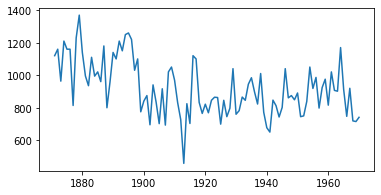

In [8]:
plt.plot(df.year, df.volume)

In [ ]:
# Understanding data with HMMlearnAPI
vals = np.expand_dims(df.volume.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [ ]:
np.bincount(hidden_states)

In [ ]:
plt.plot(hidden_states)

In [ ]:
def HMM_fit(values, n_states):
    values = np.reshape(values,[len(values),1])
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(values)
     
    # observation is either state 0 or 1
    hidden_states = model.predict(values)
 
    # parameters
    m = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(m)
    print(sigmas)
    
    relabeled_states = hidden_states
    return (relabeled_states, m, sigmas, transmat, model)

In [ ]:
hidden_states, m, sigmas, transmat, model = fitHMM(df.volume.values, 2)